In [1]:
import re
import matplotlib.pyplot as plt

In [2]:

def parse_metrics(file_name):
# Initialize lists to store the extracted data
    losses_distributed = []
    accuracy_distributed = []
    losses_centralized = []
    accuracy_centralized = []

    # Regular expressions to match the lines with loss and accuracy values
    loss_distributed_pattern = re.compile(r"losses_distributed (.+)")
    accuracy_distributed_pattern = re.compile(r"metrics_distributed {'accuracy': (.+)}")
    loss_centralized_pattern = re.compile(r"losses_centralized (.+)")
    accuracy_centralized_pattern = re.compile(r"metrics_centralized {'accuracy': (.+)}")

    # Read the log file and extract data
    with open(file_name, "r") as file:
        for line in file:
            if match := loss_distributed_pattern.search(line):
                losses_distributed = eval(match.group(1))
            elif match := accuracy_distributed_pattern.search(line):
                accuracy_distributed = eval(match.group(1))
            elif match := loss_centralized_pattern.search(line):
                losses_centralized = eval(match.group(1))
            elif match := accuracy_centralized_pattern.search(line):
                accuracy_centralized = eval(match.group(1))
    return losses_distributed ,accuracy_distributed ,losses_centralized ,accuracy_centralized 


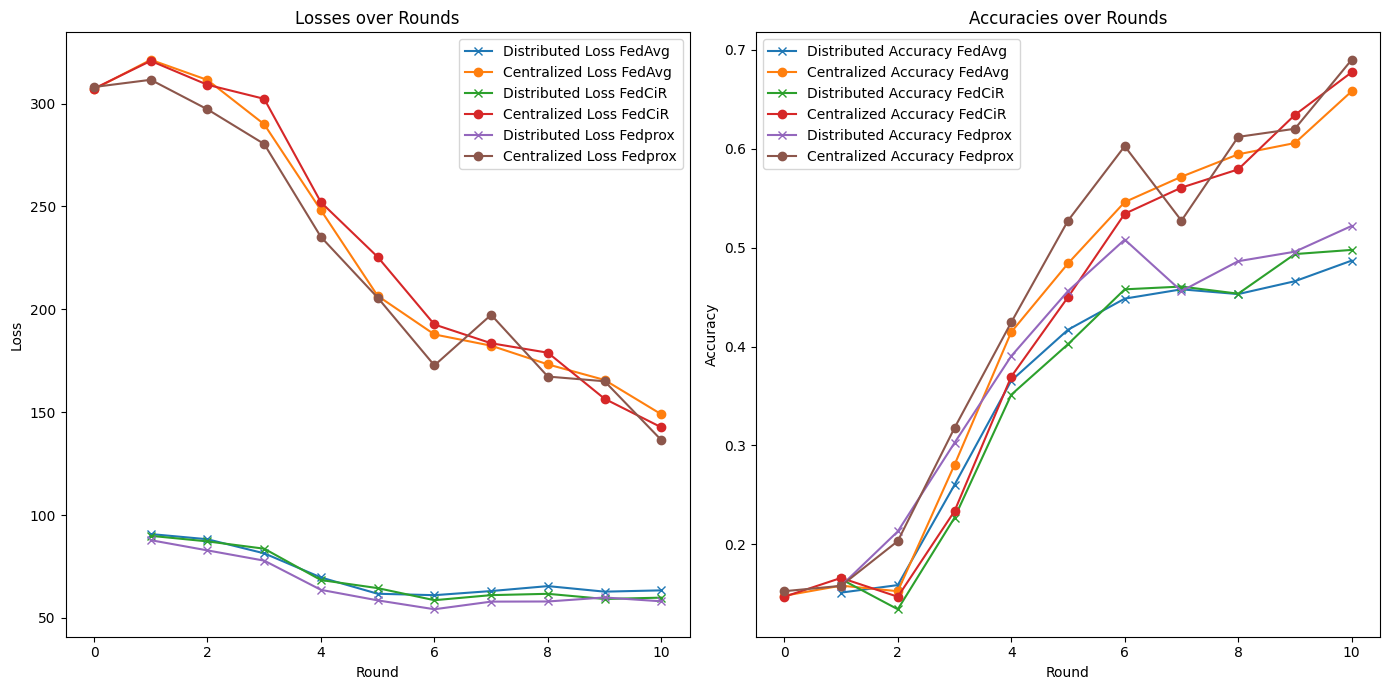

In [3]:
losses_distributed_avg, accuracy_distributed_avg, losses_centralized_avg, accuracy_centralized_avg=parse_metrics('logs_fed_avg.log')
losses_distributed_cir, accuracy_distributed_cir, losses_centralized_cir, accuracy_centralized_cir=parse_metrics('logs_fed_cir.log')
losses_distributed_prox, accuracy_distributed_prox, losses_centralized_prox, accuracy_centralized_prox=parse_metrics('logs_fed_prox.log')

# Parse the data for plotting
rounds_distributed_avg, distributed_loss_avg = zip(*losses_distributed_avg)
rounds_distributed_avg, distributed_accuracy_avg = zip(*accuracy_distributed_avg)
rounds_centralized_avg, centralized_loss_avg = zip(*losses_centralized_avg)
rounds_centralized_avg, centralized_accuracy_avg = zip(*accuracy_centralized_avg)

rounds_distributed_cir, distributed_loss_cir = zip(*losses_distributed_cir)
rounds_distributed_cir, distributed_accuracy_cir = zip(*accuracy_distributed_cir)
rounds_centralized_cir, centralized_loss_cir = zip(*losses_centralized_cir)
rounds_centralized_cir, centralized_accuracy_cir = zip(*accuracy_centralized_cir)

rounds_distributed_prox, distributed_loss_prox = zip(*losses_distributed_prox)
rounds_distributed_prox, distributed_accuracy_prox = zip(*accuracy_distributed_prox)
rounds_centralized_prox, centralized_loss_prox = zip(*losses_centralized_prox)
rounds_centralized_prox, centralized_accuracy_prox = zip(*accuracy_centralized_prox)
# Plot the losses
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(rounds_distributed_avg, distributed_loss_avg, label="Distributed Loss FedAvg", marker="x")
plt.plot(rounds_centralized_avg, centralized_loss_avg, label="Centralized Loss FedAvg", marker="o")
plt.plot(rounds_distributed_cir, distributed_loss_cir, label="Distributed Loss FedCiR", marker="x")
plt.plot(rounds_centralized_cir, centralized_loss_cir, label="Centralized Loss FedCiR", marker="o")
plt.plot(rounds_distributed_prox, distributed_loss_prox, label="Distributed Loss Fedprox", marker="x")
plt.plot(rounds_centralized_prox, centralized_loss_prox, label="Centralized Loss Fedprox", marker="o")
plt.title("Losses over Rounds")
plt.xlabel("Round")
plt.ylabel("Loss")
plt.legend()

# Plot the accuracies
plt.subplot(1, 2, 2)
plt.plot(
    rounds_distributed_avg, distributed_accuracy_avg, label="Distributed Accuracy FedAvg", marker="x"
)
plt.plot(
    rounds_centralized_avg, centralized_accuracy_avg, label="Centralized Accuracy FedAvg", marker="o"
)
plt.plot(
    rounds_distributed_cir, distributed_accuracy_cir, label="Distributed Accuracy FedCiR", marker="x"
)
plt.plot(
    rounds_centralized_cir, centralized_accuracy_cir, label="Centralized Accuracy FedCiR", marker="o"
)
plt.plot(
    rounds_distributed_prox, distributed_accuracy_prox, label="Distributed Accuracy Fedprox", marker="x"
)
plt.plot(
    rounds_centralized_prox, centralized_accuracy_prox, label="Centralized Accuracy Fedprox", marker="o"
)
plt.title("Accuracies over Rounds")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
import torch
import torchvision.models as models

# Load the pre-trained ResNet-18 model from torchvision
resnet18 = models.resnet18(pretrained=True)

# Print the number of input features to the fully connected layer
print(resnet18.fc.in_features)

/home/mayag88/mayag88/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mayag88/mayag88/miniconda3/envs/py38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mayag88/mayag88/miniconda3/envs/py38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.

512
